<a href="https://colab.research.google.com/github/tesyaeriana/PCVK_Semester-5/blob/main/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAMA: TESYA ERIANA**<br>
**NO ABSEN: 28**<br>
**KELAS: TI-3A**<br>
**PERTEMUAN 10: GLOBAL THRESHOLDING**



**PERCOBAAN PRAKTIKUM**

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


**Penggunaan Library OpenCV cv.Threshold**

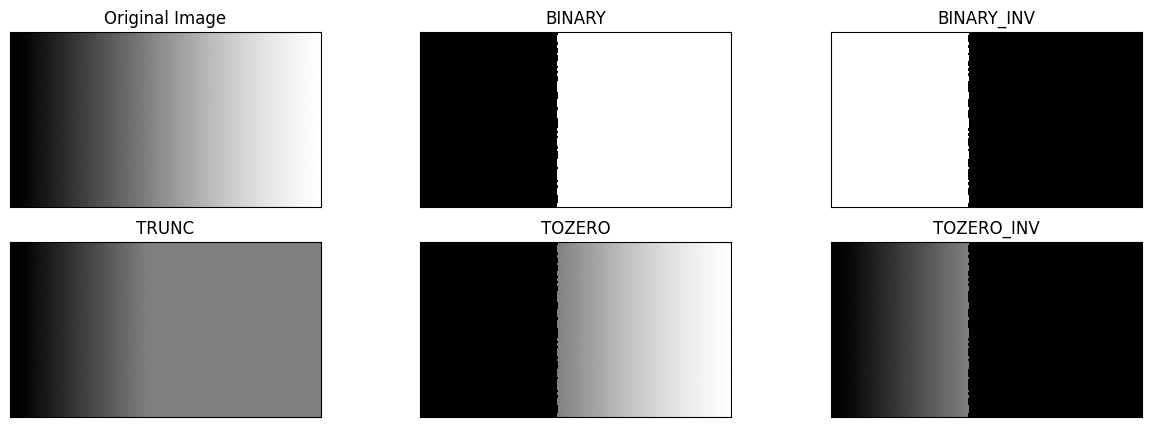

In [4]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

filename = ('/content/drive/MyDrive/pcvk/image_thres/gradient.jpg')
img = cv.imread(filename)
thresh = 127      #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

**Adaptive Threshold**

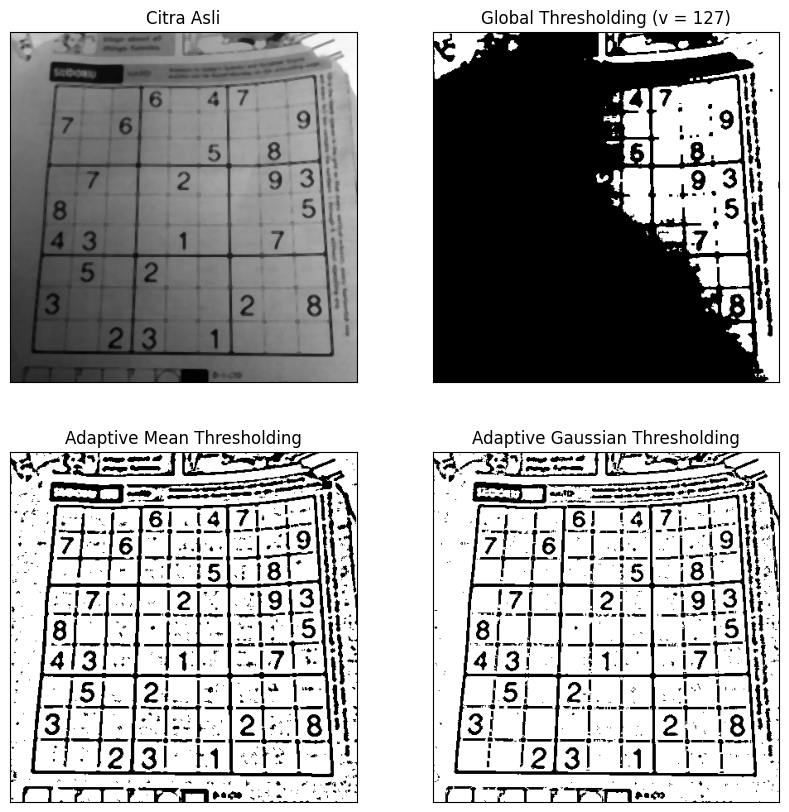

In [5]:
filename = ('/content/drive/MyDrive/pcvk/image_thres/sudoku-original.jpg')
citra = cv.medianBlur(cv.imread(filename),5)
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)
#gray = cv.medianBlur(gray,5)

thresh = 127

ret,th1 = cv.threshold(gray,thresh,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv
.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C
, cv.THRESH_BINARY,11,2)

titles = ['Citra Asli', 'Global Thresholding (v = 127)',  'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
citra2 = [gray, th1, th2, th3]

plt.figure(figsize = (10,10))
for i in range(len(citra2)):
    plt.subplot(2,2,i+1),plt.imshow(citra2[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

**Otsu's Threshold dengan library**

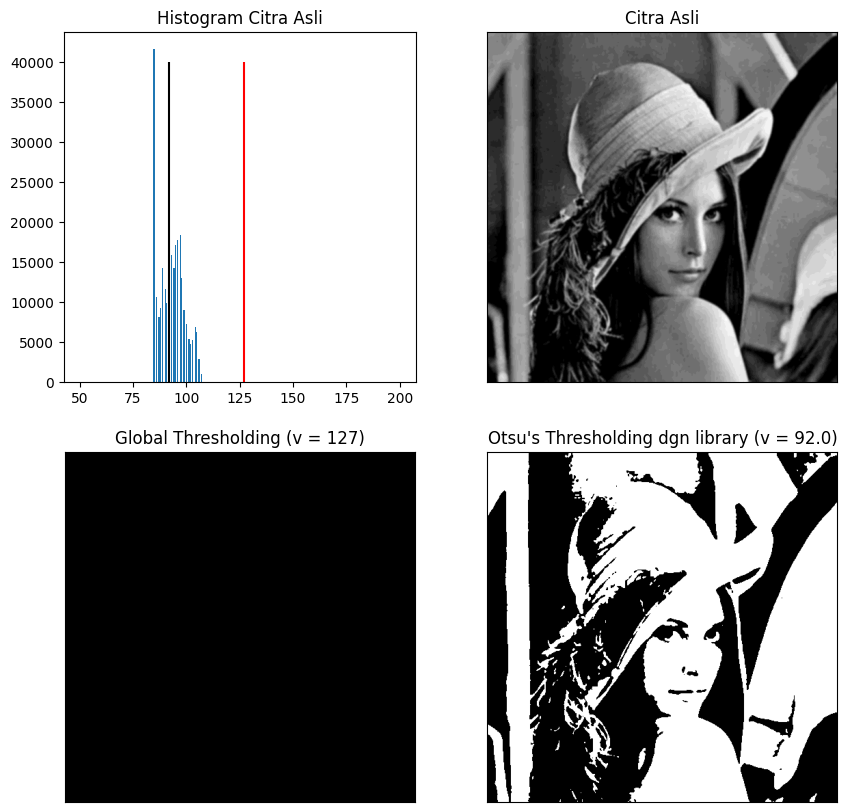

In [6]:
# Dengan Library
filename = ('/content/drive/MyDrive/pcvk/image_thres/lena_gs_lc2.jpg')
img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)
thresh = 127

ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])
plt.vlines(ret,0,40000,colors='red')     #garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black')  #garis vertikal hitam menunjukkan threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')
for i in range(len(citra3)):
    plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

**Otsu's Threshold tanpa library**

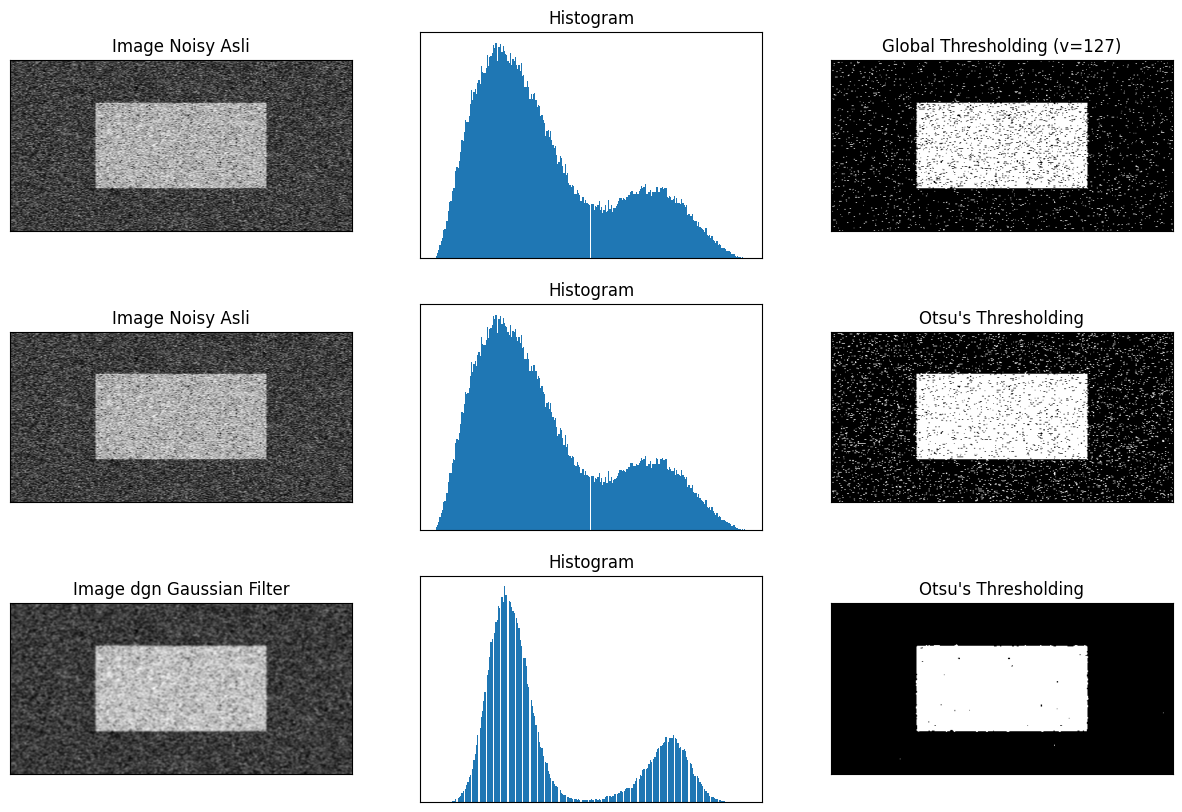

In [7]:
filename = ('/content/drive/MyDrive/pcvk/image_thres/noisy2.png')
img = cv.imread(filename,0)

#Global Thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding setelah dilakukan Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
#plotting semua image
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Image Noisy Asli','Histogram','Global Thresholding (v=127)','Image Noisy Asli','Histogram',"Otsu's Thresholding", 'Image dgn Gaussian Filter','Histogram',"Otsu's Thresholding"]
plt.figure(figsize = (15,10))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()


**Segmentasi Citra Menggunakan Metode K-Means**



(<Axes: >, <matplotlib.image.AxesImage at 0x7aa6496a4bb0>)

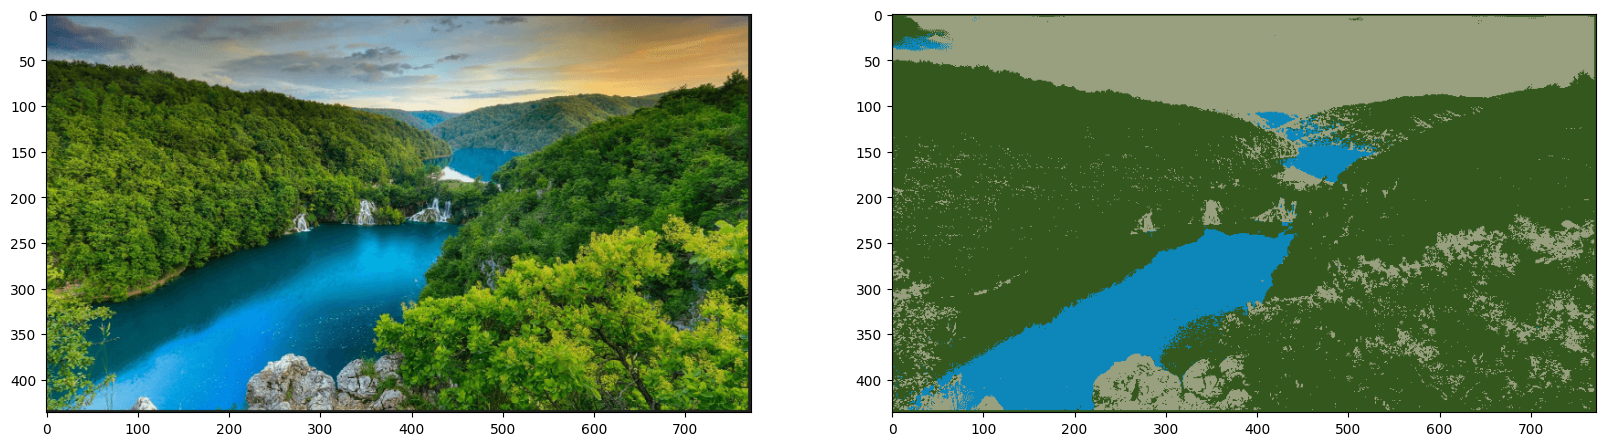

In [8]:
#KMeans Image Segmentation
filename = ('/content/drive/MyDrive/pcvk/image_thres/jungle.png')
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

#reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)


criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)
plt.figure(figsize = (20,20))
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(1,2,2),plt.imshow(segmented_image)

(<Axes: >, <matplotlib.image.AxesImage at 0x7aa6882f4af0>)

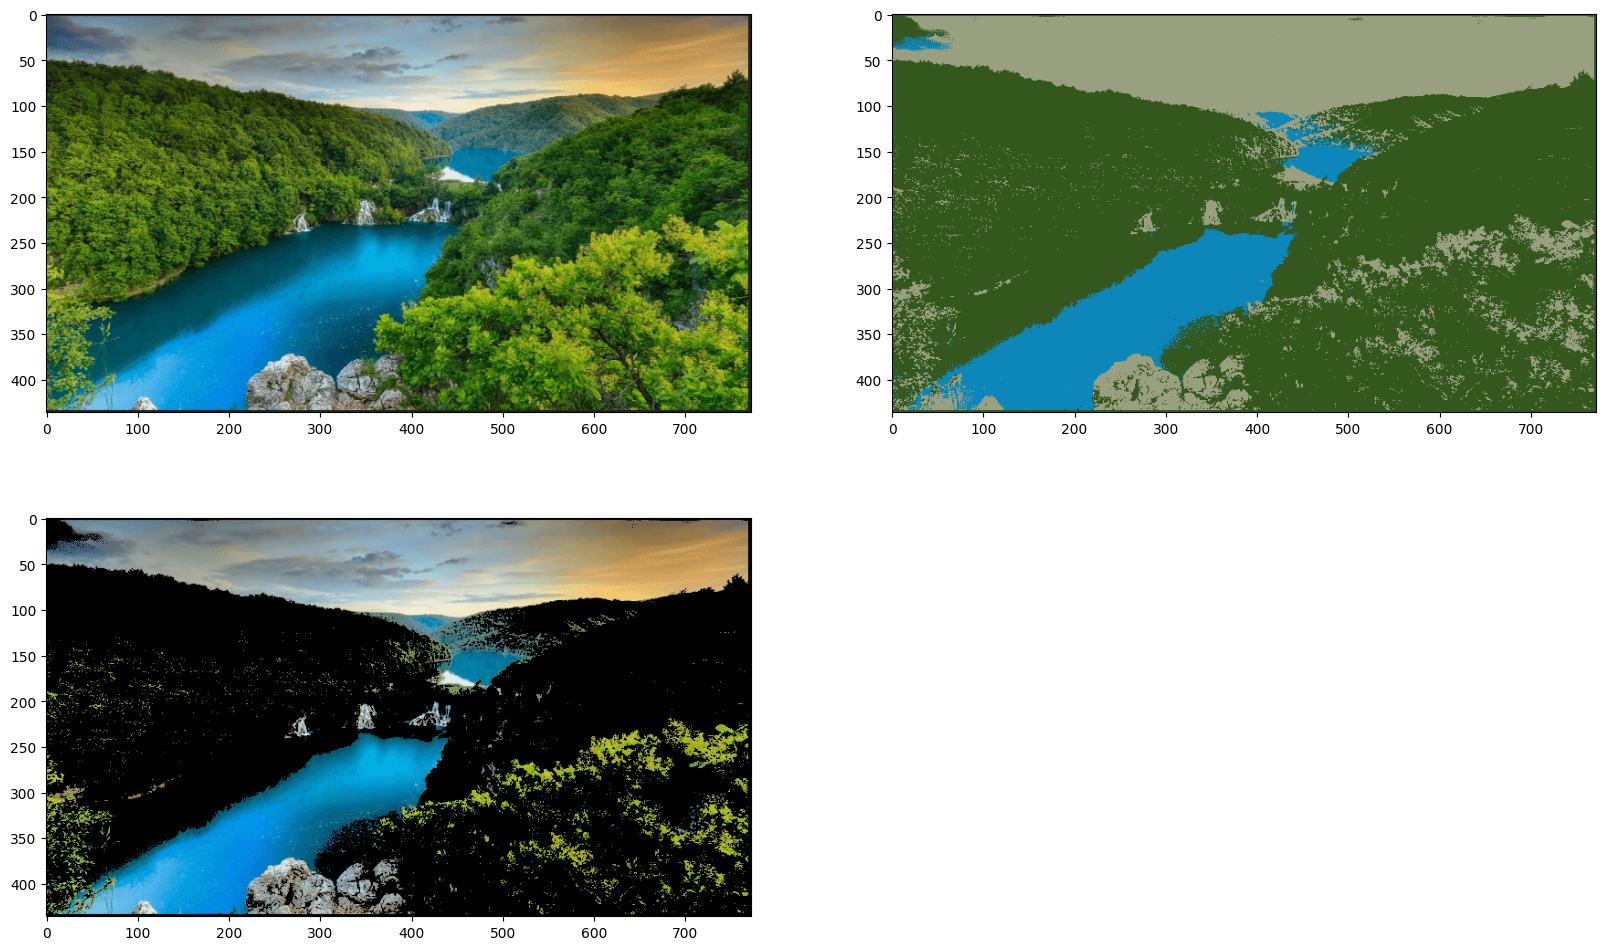

In [9]:
# ubah pixel di cluster 2 menjadi hitam
masked_image = np.copy(img)
# konvert ke bentuk vektor
masked_image = masked_image.reshape((-1, 3))
# cluster yang diubah
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# konvert ke bentuk asli
masked_image = masked_image.reshape(img.shape)

plt.figure(figsize = (20,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(segmented_image)
plt.subplot(2,2,3),plt.imshow(masked_image)

**TUGAS PRAKTIKUM**




> Mengimport beberapa library yang akan digunakan.



In [13]:
pip install pytesseract

In [14]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image



> Membuat Global Threshold (BINARY, BINARY_INV,TRUNC,TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di bawah.




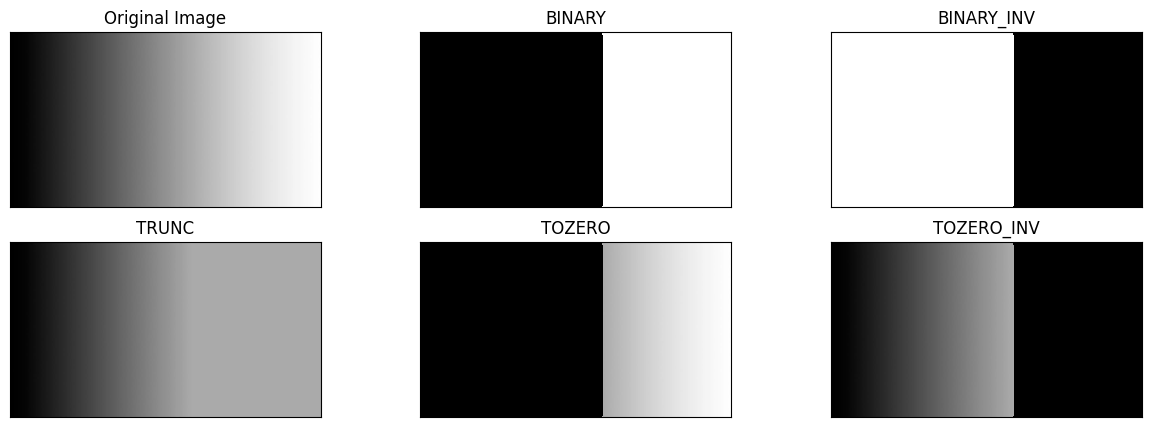

In [15]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

filename = ('/content/drive/MyDrive/pcvk/image_thres/gradient.jpg')
img = cv.imread(filename)
thresh = 170     #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()



> Membuat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)




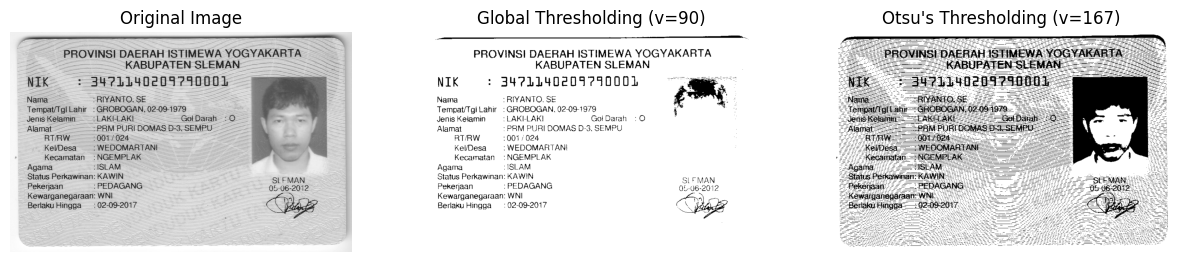

In [28]:
filename = '/content/drive/MyDrive/pcvk/KTP_More/ktp.png'
img = cv.imread(filename, 0)

# Global Thresholding
ret1, th1 = cv.threshold(img, 90, 255, cv.THRESH_BINARY)

# Otsu's thresholding
ret2, th2 = cv.threshold(img, 167, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Create a single plot with original image, global threshold, and Otsu's threshold
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Global Thresholding
plt.subplot(132)
plt.imshow(th1, cmap='gray')
plt.title('Global Thresholding (v=90)')
plt.axis('off')

# Otsu's Thresholding
plt.subplot(133)
plt.imshow(th2, cmap='gray')
plt.title("Otsu's Thresholding (v=167)")
plt.axis('off')

plt.show()




> Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images. Petunjuk: <br>
a. anda dapat gunakan cv.calcHist untuk menampilkan histogram. <br>
b. Buka link berikut https://opencvtutorial readthedocs.io/en/latest/histogram/histogram.html <br>
c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang dimasking warna putih yang akan dihitung histogramnya (dari contoh dibawah dinamakan dengan Citra Segment).









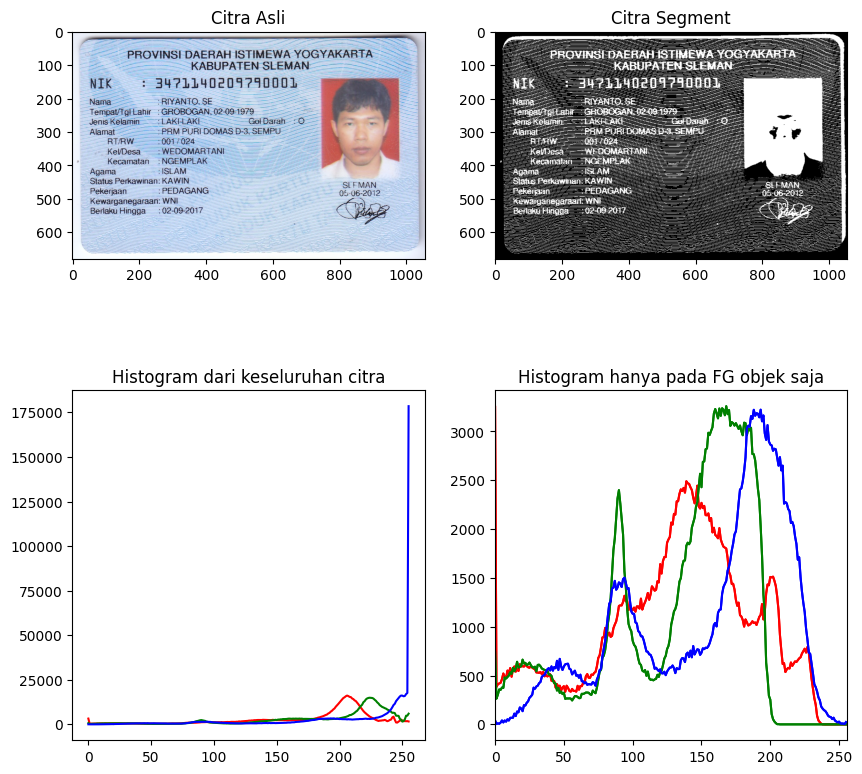

In [44]:
pict_3 = ('/content/drive/MyDrive/pcvk/KTP_More/ktp.png')
img_l = cv2.imread(pict_3)
img_rgb = cv2.cvtColor(img_l,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])



> Melakukan segmentasi warna pada image " ktp Riyanto jpg ", munculkan hanya warna yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)




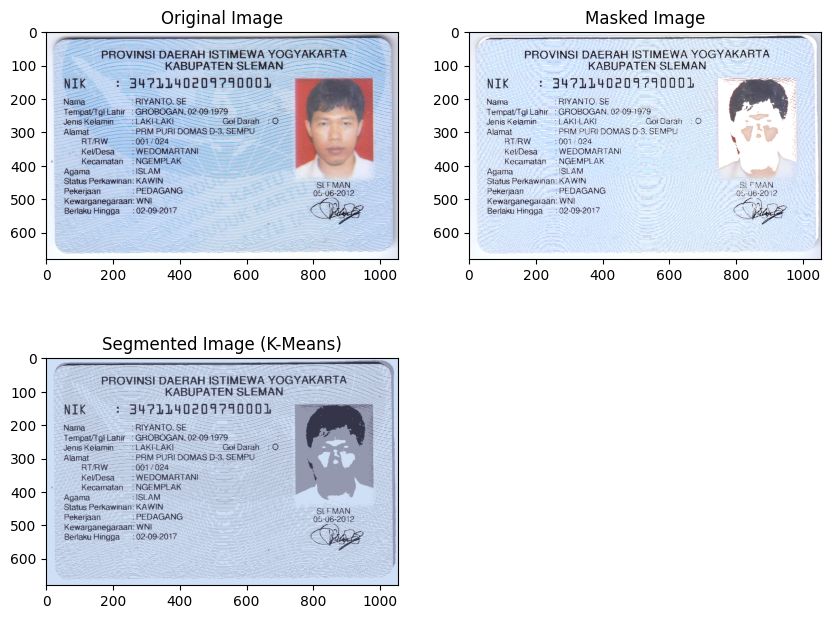

In [42]:
from sklearn.cluster import KMeans

filename = '/content/drive/MyDrive/pcvk/KTP_More/ktp.png'
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Flatten the pixel values
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define the criteria and the number of clusters (k)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3# Number of clusters

# Apply K-Means clustering
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to integers
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Create a masked image by turning one cluster into white
masked_image = np.copy(img)
masked_image = masked_image.reshape((-1, 3))
cluster_to_white = 2
masked_image[labels == cluster_to_white] = [255, 255, 255]
masked_image = masked_image.reshape(img.shape)

# Convert the segmented image back to the original shape
segmented_image = centers[labels].reshape(img.shape)

# Display the original image, segmented image, and masked image
plt.figure(figsize=(10, 12))
plt.subplot(3, 2, 1), plt.imshow(img)
plt.title('Original Image')

plt.subplot(3, 2, 2), plt.imshow(masked_image)
plt.title('Masked Image')

plt.subplot(3, 2, 3), plt.imshow(segmented_image)
plt.title('Segmented Image (K-Means)')

plt.show()

**TUGAS**


> Tugasnya adalah mengimplementasikan thresholding dengan beberapa metode yang telah Anda ketahui untuk melakukan segmentasi pada dataset KTP pertemuan 7.




**Thresholding Menggunakan Adaptive Threshold**

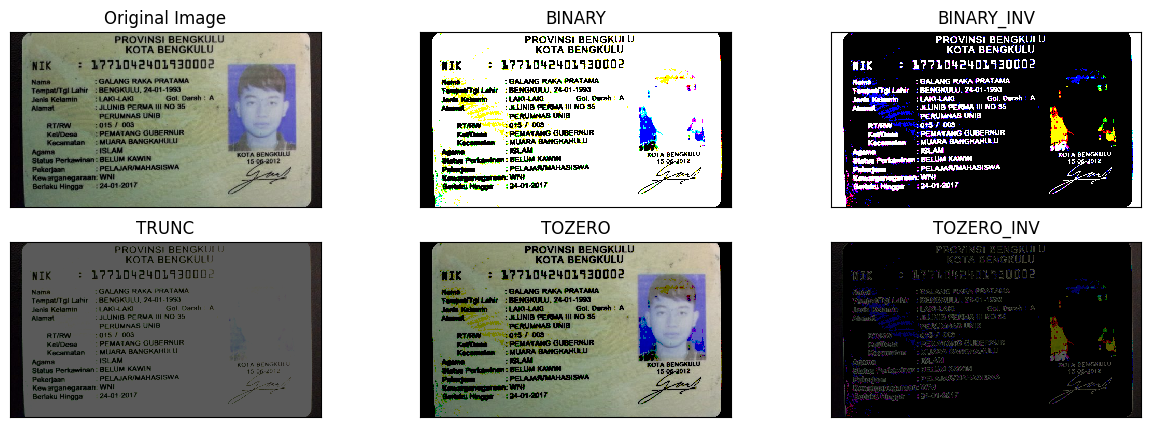

In [48]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

filename = ('/content/drive/MyDrive/pcvk/KTP_More/ktp1.png')
img = cv.imread(filename)
thresh = 90    #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

**Threshold Menggunakan Global Threshold dan Otsu's Threshold**

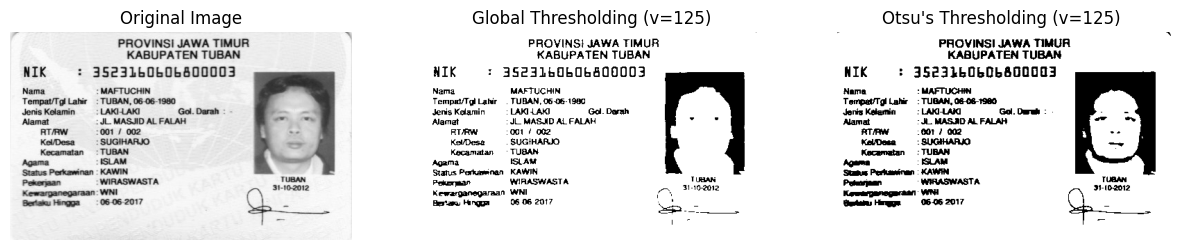

In [53]:
filename = '/content/drive/MyDrive/pcvk/KTP_More/ktp4.png'
img = cv.imread(filename, 0)

# Global Thresholding
ret1, th1 = cv.threshold(img, 125, 255, cv.THRESH_BINARY)

# Otsu's thresholding
ret2, th2 = cv.threshold(img, 125, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Create a single plot with original image, global threshold, and Otsu's threshold
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Global Thresholding
plt.subplot(132)
plt.imshow(th1, cmap='gray')
plt.title('Global Thresholding (v=125)')
plt.axis('off')

# Otsu's Thresholding
plt.subplot(133)
plt.imshow(th2, cmap='gray')
plt.title("Otsu's Thresholding (v=125)")
plt.axis('off')

plt.show()




> Dilihat dari output dengan nilai V yang sama yaitu 125 Otsu's Thersholding menghasilkan output lebih bold



**Segmentasi Menggunakan Metode K-Means**

(<Axes: >, <matplotlib.image.AxesImage at 0x7aa62c415990>)

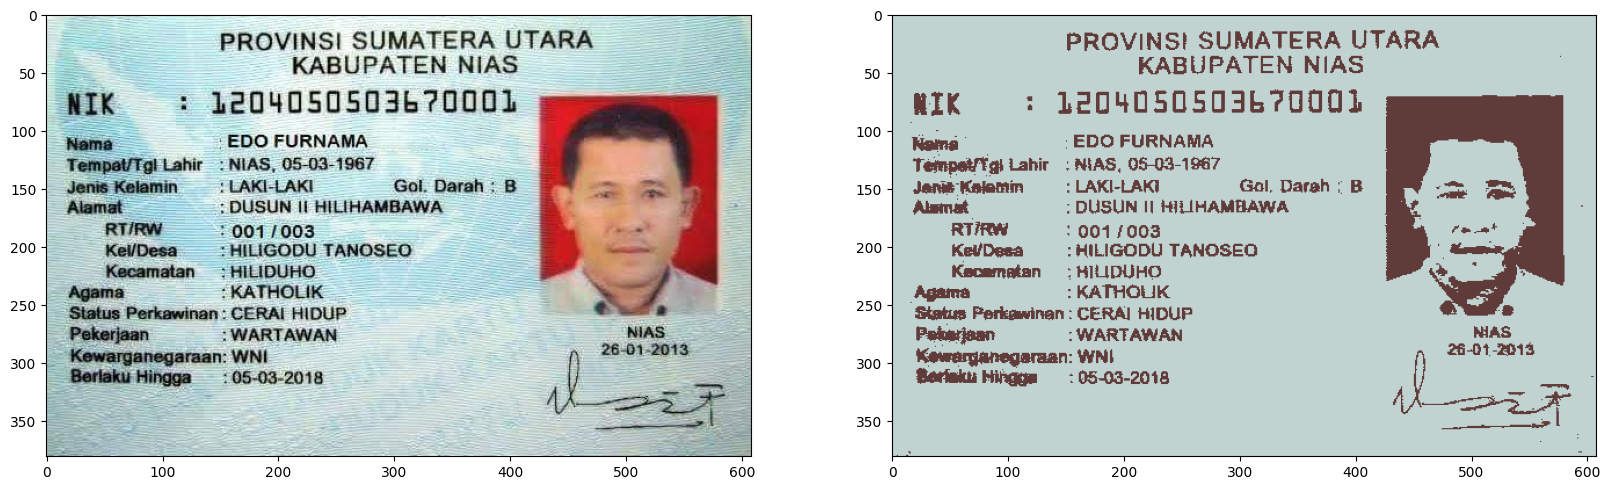

In [51]:
#KMeans Image Segmentation
filename = '/content/drive/MyDrive/pcvk/KTP_More/ktp5.png'
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

#reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
#Menentukan nilai K
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 2
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)
plt.figure(figsize = (20,20))
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(1,2,2),plt.imshow(segmented_image)